In [60]:
import numpy as np
from PIL import Image
import skimage as ski
import matplotlib.pyplot as plt
from amsurf.OTSU import OTSU
from amsurf.BRDF import BRDF_dig_sum
import matplotlib as mpl

mpl.rcParams['font.size'] = 14
%matplotlib inline

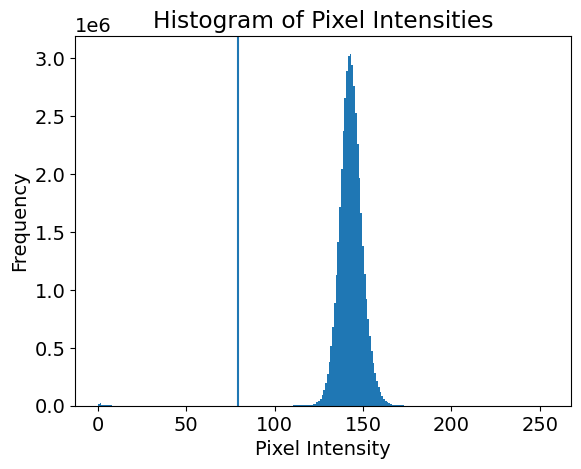

In [62]:
img_path = "../data/project_sharepoint/04_Sample03_IA_flat/20250502_IA_CCAM_M5/Acquisition_08.tif"
img = Image.open(img_path).convert("L")
img_arr = np.array(img)

thresh = ski.filters.threshold_otsu(img_arr)

# plot the histogram
fig, ax = plt.subplots()
ax.hist(img_arr.ravel(), bins=256)
# ax.set_yscale('log')
ax.axvline(thresh)
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pixel Intensities')
plt.show()


1 mm = 796 pixels
1 pixel = 0.001256281407035176 mm


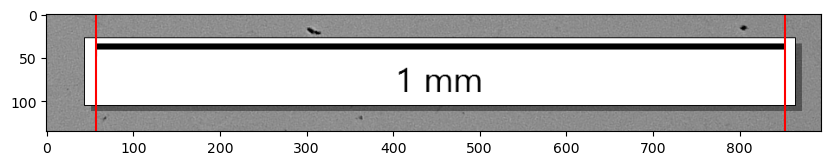

In [45]:
scale_path = "../data/project_sharepoint/04_Sample03_IA_flat/20250502_IA_CCAM_M5/Acquisition_08.png"
img_scl = Image.open(scale_path).convert("L")
img_scl = np.array(img_scl)

scl_low = 57
scl_high = 853

print(f"1 mm = {scl_high - scl_low} pixels")
print(f"1 pixel = {1/(scl_high - scl_low)} mm")

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_scl[6200:, 6150:], cmap='gray')
ax.axvline(57, c='r', linestyle='-')
ax.axvline(853, c='r', linestyle='-')
plt.show()



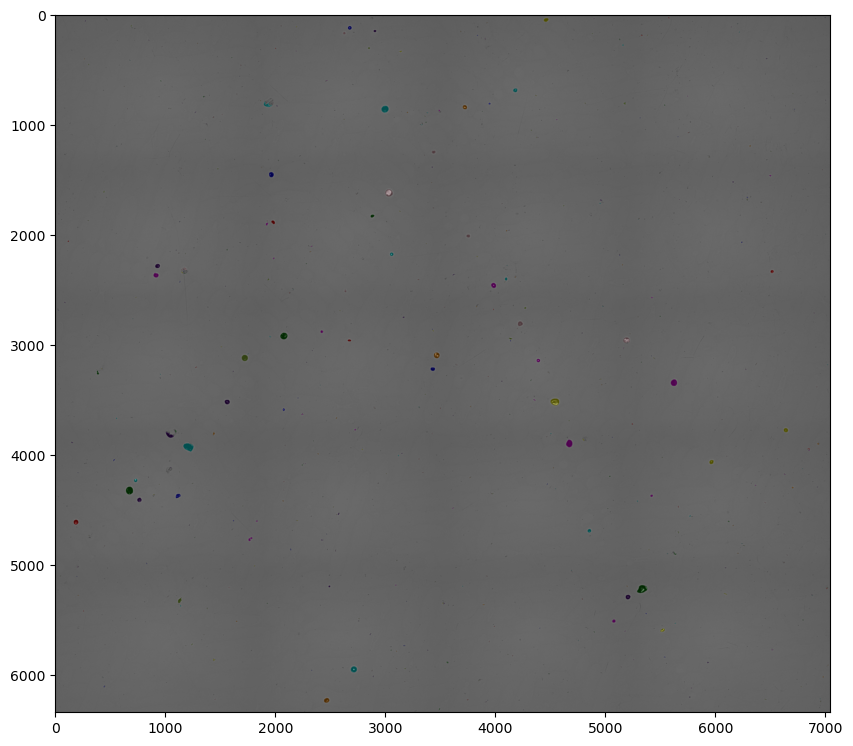

In [46]:
img_regs = OTSU(img_path, plot=True)

plt.show()

1 pixel = 1.256281407035176 mm
1 pixel = 1.5782429736622816 mm²


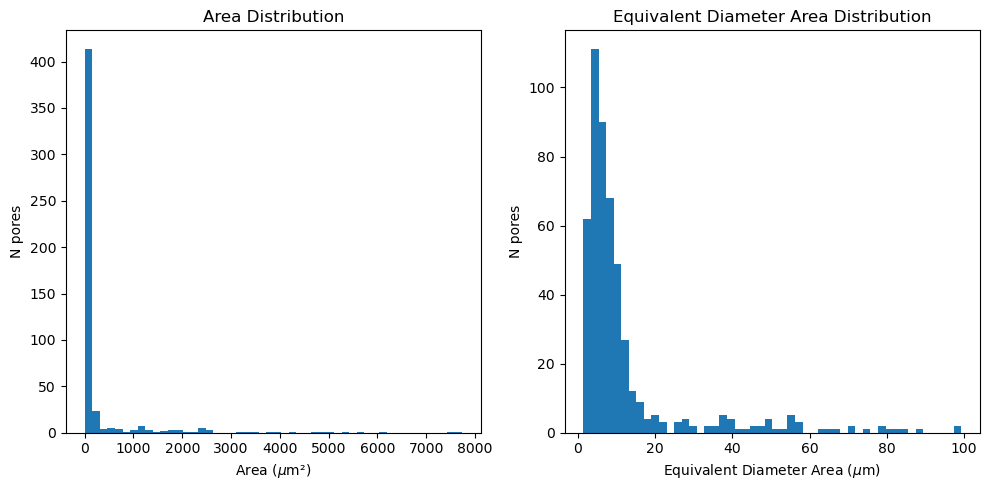

In [47]:
# statistics
pix_len = (1/(scl_high - scl_low)) * 1000  # mm to microns
pix_size = pix_len**2

print(f"1 pixel = {pix_len} mm")
print(f"1 pixel = {pix_size} mm²")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img_regs['area'] * pix_size, bins=50)
ax[0].set_title('Area Distribution')
ax[0].set_xlabel('Area ($\mu$m²)')
ax[0].set_ylabel('N pores')
ax[1].hist(img_regs['equivalent_diameter_area'] * pix_len, bins=50)
ax[1].set_title('Equivalent Diameter Area Distribution')
ax[1].set_xlabel('Equivalent Diameter Area ($\mu$m)')
ax[1].set_ylabel('N pores')
plt.tight_layout()
plt.show()

Image size: 7958.54271356784 x 8850.502512562814 microns
Image area: 70437102.28277065 microns²


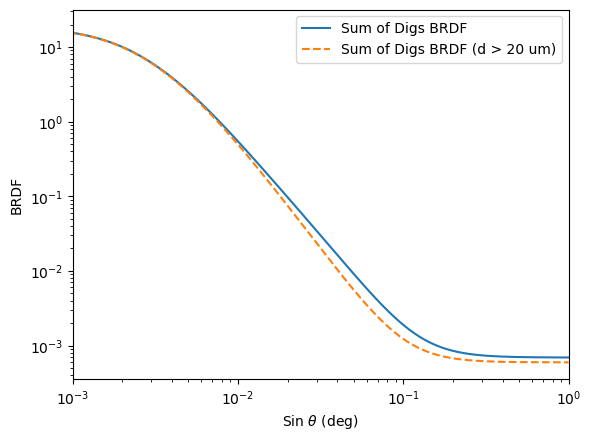

In [58]:
# BRDF calculation
dmtr_arr = img_regs['equivalent_diameter_area'] * pix_len  # convert to microns
imgX = np.shape(img_arr)[0] * pix_len# convert to microns
imgY = np.shape(img_arr)[1] * pix_len  # convert to microns

big_dmtr_arr = dmtr_arr[dmtr_arr > 20]  # remove zero diameters

img_size = (imgX, imgY)
print(f"Image size: {img_size[0]} x {img_size[1]} microns")

img_area = imgX * imgY  # in microns²
print(f"Image area: {img_area} microns²")

theta = np.linspace(0, np.pi / 2, 10000)

brdf_dig = BRDF_dig_sum(dmtr_arr, img_area, .6, theta)
big_brdf_dig = BRDF_dig_sum(big_dmtr_arr, img_area, .6, theta)

fig, ax = plt.subplots()
ax.plot(np.sin(theta), brdf_dig, label='Sum of Digs BRDF')
ax.plot(np.sin(theta), big_brdf_dig, label='Sum of Digs BRDF (d > 20 um)', linestyle='--')
ax.set_xlabel(r"Sin ${\theta}$ (deg)")
ax.set_ylabel("BRDF")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.001, 1)
ax.legend()
plt.show()